In [1]:
#importing necessary libraries
import pandas as pd
from prophet import Prophet

#disabling warnings
import warnings
warnings.simplefilter('ignore')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-25,45.849998,46.230000,45.182499,45.542500,43.523838,126652400
1,2018-06-26,45.747501,46.632500,45.634998,46.107498,44.063801,98276800
2,2018-06-27,46.307499,46.820000,46.007500,46.040001,43.999290,101141200
3,2018-06-28,46.025002,46.552502,45.950001,46.375000,44.319443,69460800
4,2018-06-29,46.572498,46.797501,45.727501,46.277500,44.226265,90950800


In [4]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
df['ds'] = pd.DatetimeIndex(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   object        
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
 7   ds         1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 78.8+ KB


In [6]:
df.drop(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [7]:
df.head()

,y,ds
0,45.542500,2018-06-25
1,46.107498,2018-06-26
2,46.040001,2018-06-27
3,46.375000,2018-06-28
4,46.277500,2018-06-29


In [8]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

12:21:27 - cmdstanpy - INFO - Chain [1] start processing
12:21:27 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=250, freq='D')
forcast = m.predict(future)
forcast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-06-25,45.684287,32.922069,62.082027,45.684287,45.684287,1.619208,1.619208,1.619208,1.977719,...,0.128697,0.128697,0.128697,-0.487209,-0.487209,-0.487209,0.0,0.0,0.0,47.303495
1,2018-06-26,45.680988,33.698927,61.511821,45.680988,45.680988,1.644922,1.644922,1.644922,1.977719,...,0.133438,0.133438,0.133438,-0.466236,-0.466236,-0.466236,0.0,0.0,0.0,47.325910
2,2018-06-27,45.677688,32.915356,61.589456,45.677688,45.677688,1.681591,1.681591,1.681591,1.977719,...,0.135500,0.135500,0.135500,-0.431629,-0.431629,-0.431629,0.0,0.0,0.0,47.359279
3,2018-06-28,45.674389,31.653207,60.554467,45.674389,45.674389,1.696798,1.696798,1.696798,1.977719,...,0.101758,0.101758,0.101758,-0.382680,-0.382680,-0.382680,0.0,0.0,0.0,47.371187
4,2018-06-29,45.671090,33.184804,61.127055,45.671090,45.671090,1.653731,1.653731,1.653731,1.977719,...,-0.004965,-0.004965,-0.004965,-0.319024,-0.319024,-0.319024,0.0,0.0,0.0,47.324821


In [13]:
forcast[['ds', 'yhat']]

,ds,yhat
0,2018-06-25,47.303495
1,2018-06-26,47.325910
2,2018-06-27,47.359279
3,2018-06-28,47.371187
4,2018-06-29,47.324821
...,...,...
1503,2024-02-24,178.523165
1504,2024-02-25,178.059980
1505,2024-02-26,177.987962
1506,2024-02-27,177.567035


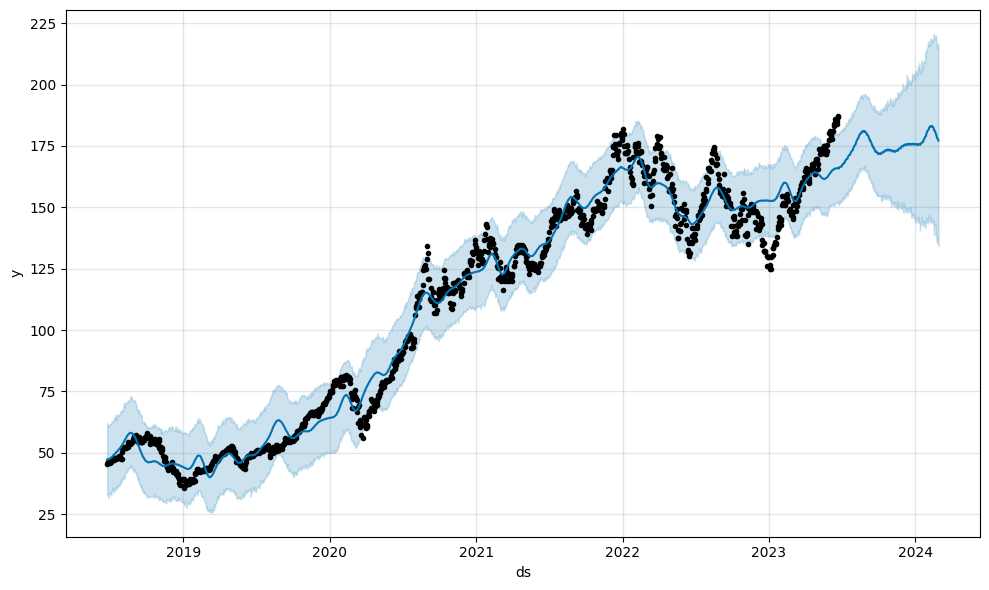

In [14]:
plot1 = m.plot(forcast)

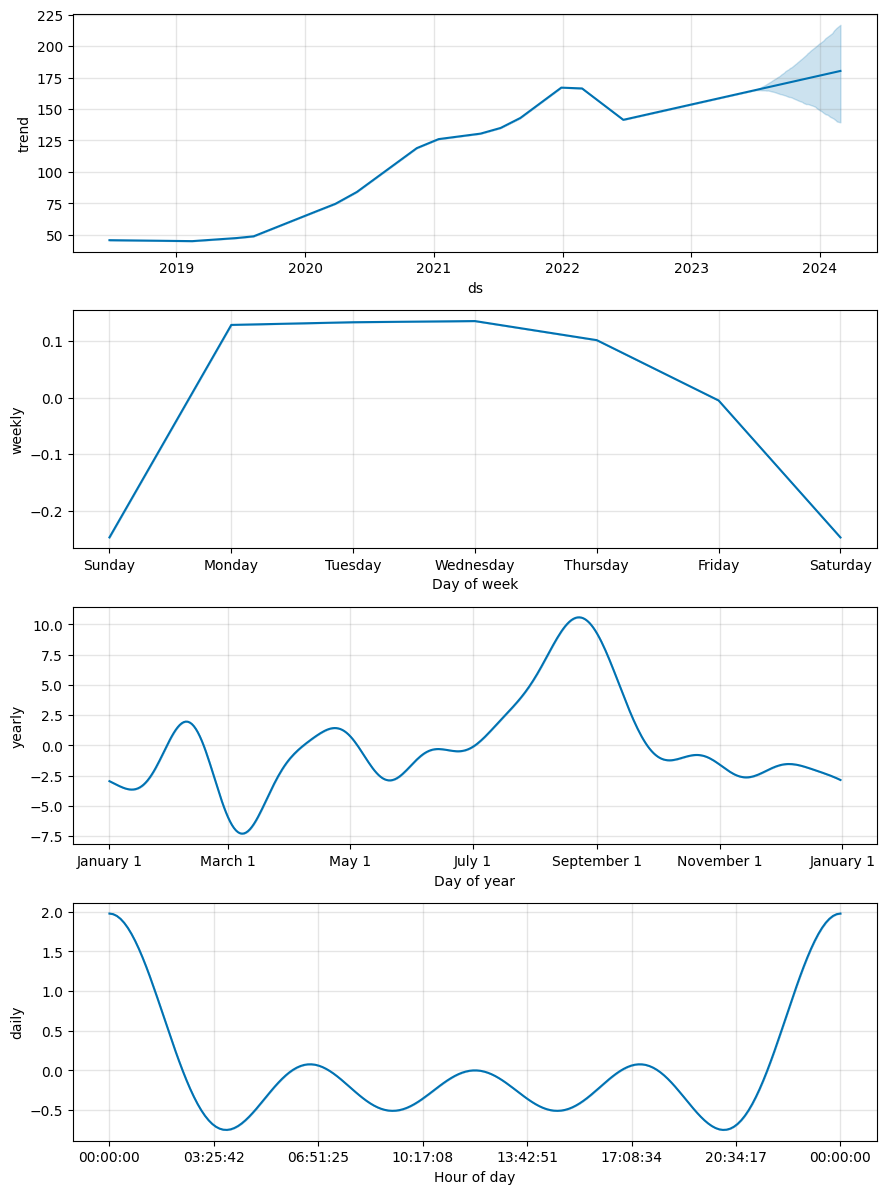

In [15]:
plot2 = m.plot_components(forcast)